In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_excel('E:\PTDL\house_price_dống-da.xlsx')
df.head()

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [4]:
df.isna().sum()/len(df)*100

title                 0.0
address               0.0
area                  0.6
price                 5.6
postDate              0.0
land_certificate     30.7
house_direction      95.6
balcony_direction    97.6
toilet               44.9
bedroom              36.5
floor                62.4
type_of_land          0.0
street_name          19.2
ward_name            19.8
district_name         0.0
city_name             0.0
lat                   0.0
long                  0.0
dtype: float64

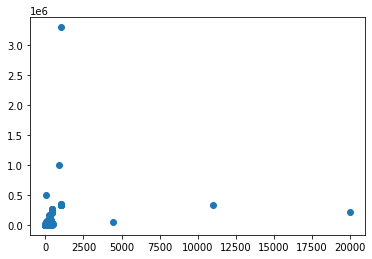

In [5]:
x = df['area']
y= df['price']
plt.scatter(x,y)
plt.show()

In [14]:
# Xử lý dữ liệu ngoại lai
df.drop(df[df['area']>=550].index, axis=0, inplace=True)

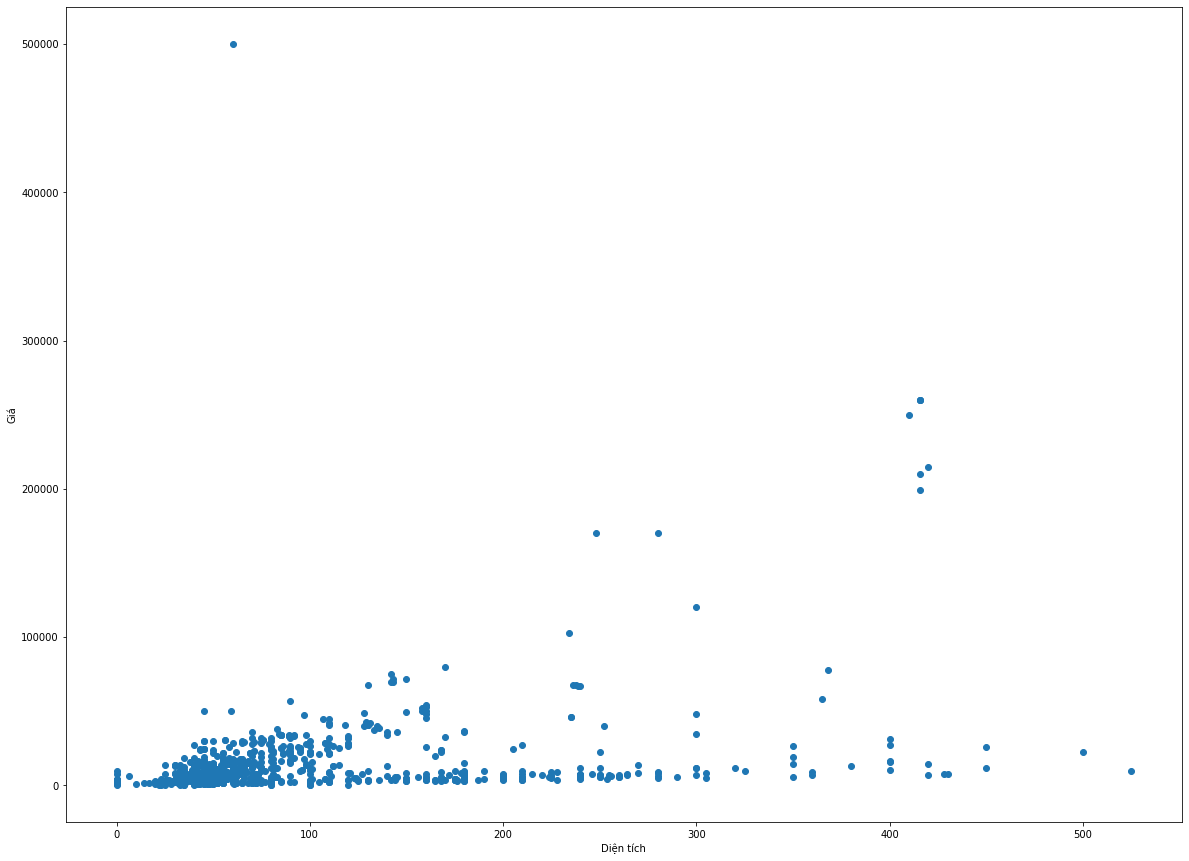

In [17]:
fig = plt.figure(figsize=(20,15))
x = df['area']
y= df['price']
plt.scatter(x,y)
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

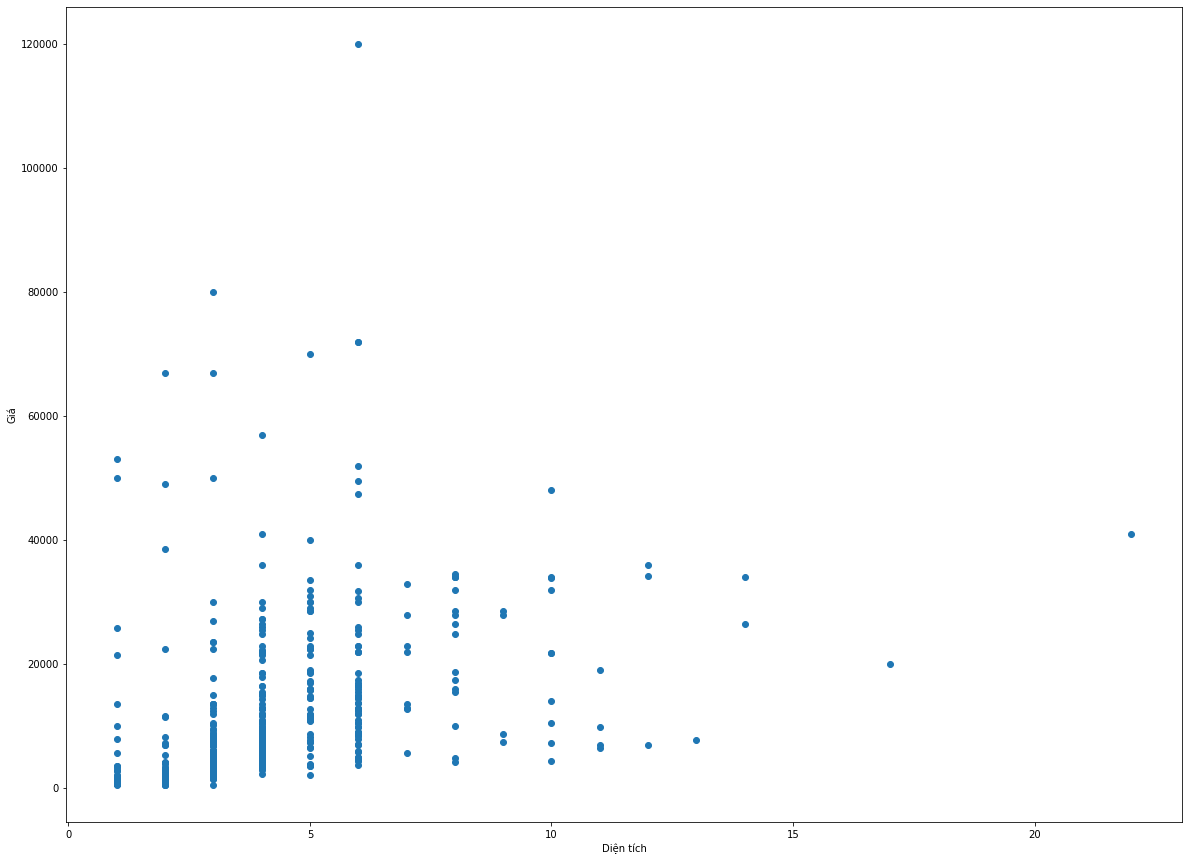

In [18]:
# giữa số phòng ngủ với giá nhà
fig = plt.figure(figsize=(20,15))
x = df['bedroom']
y= df['price']
plt.scatter(x,y)
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

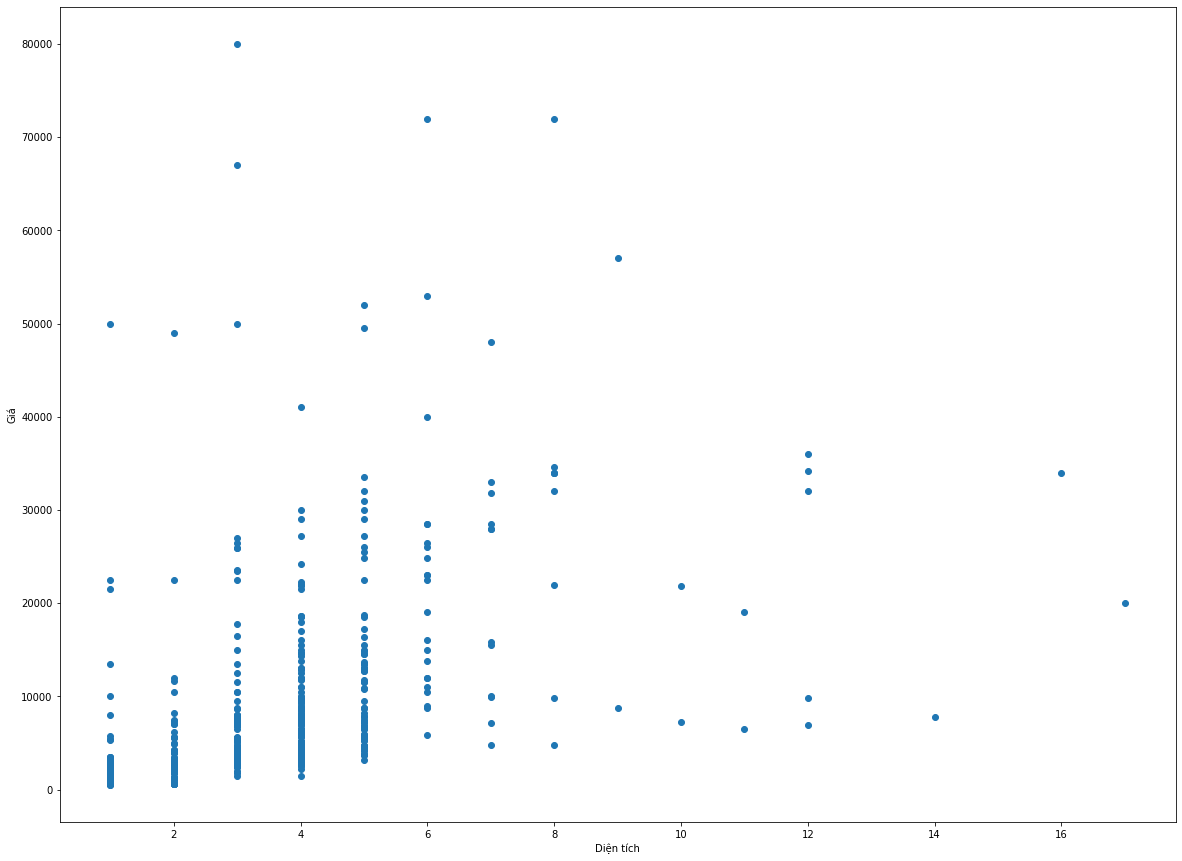

In [19]:
# giữa số toilet với giá nhà
fig = plt.figure(figsize=(20,15))
x = df['toilet']
y= df['price']
plt.scatter(x,y)
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.show()

In [20]:
# Tính toán giá/m2  ( đơn vị triệu/m2)
df['trieu/m2'] = df['price']/df['area']

,trieu/m2
type_of_land,
Bán nhà mặt phố,392.024509
Bán nhà mặt phố\n,338.584416
Bất động sản khác\n,236.683993
Bán nhà riêng\n,171.494858
Đất thổ cư,133.153612
"Tập thể, cư xá",33.353309
Chung cư,26.826948
Bán nhà riêng,NaN
Bất động sản khác,NaN


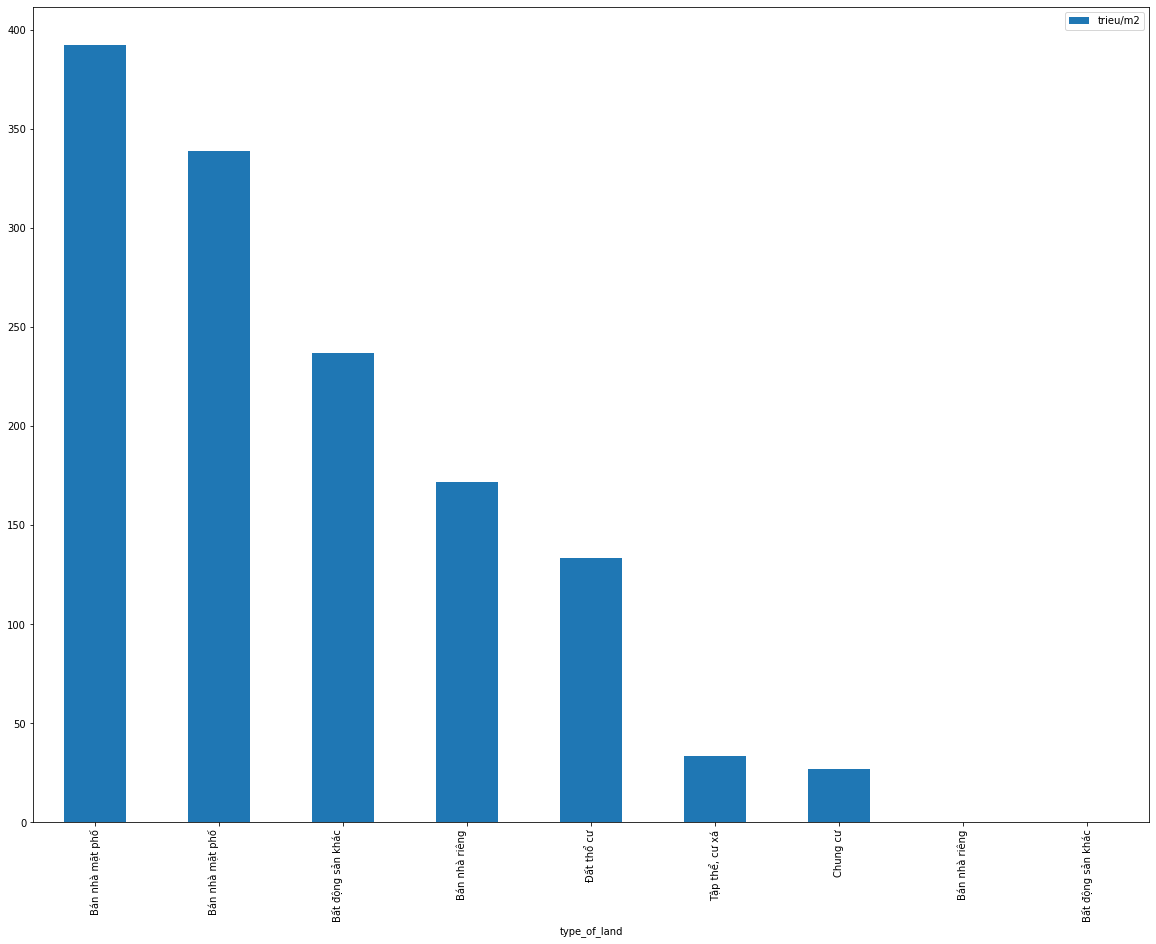

In [23]:
type_of_land_group = df.groupby(df.type_of_land) # group cac loai nha

mean_price_type_of_land = pd.DataFrame(type_of_land_group['trieu/m2'].mean()).sort_values('trieu/m2' ,ascending=False) # tao dataframe tinh mean cua tung loai nha
mean_price_type_of_land.plot(kind = 'bar', figsize = (20,15))
mean_price_type_of_land

In [50]:
# Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).


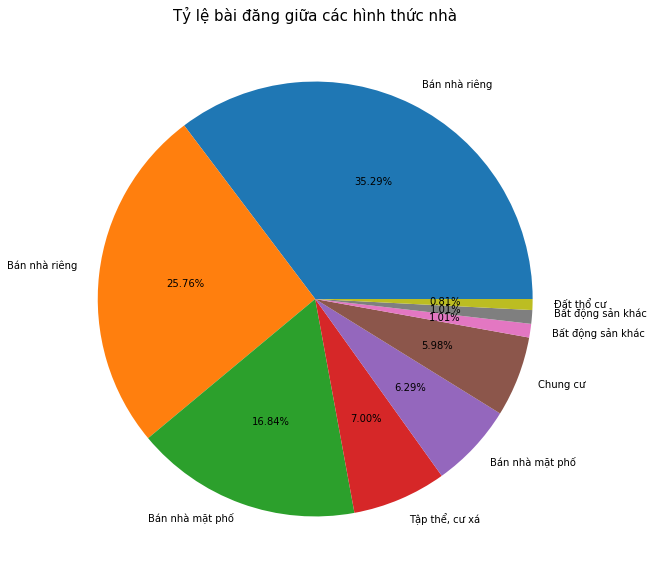

In [60]:
series = df['type_of_land'].value_counts()
df_type_of_land_count = pd.DataFrame(series)
fig = plt.figure(figsize=(10,10))
plt.pie(df_type_of_land_count['type_of_land'], labels= df_type_of_land_count.index , autopct='%1.2f%%')
plt.title('Tỷ lệ bài đăng giữa các hình thức nhà', fontsize= 15)
plt.show()

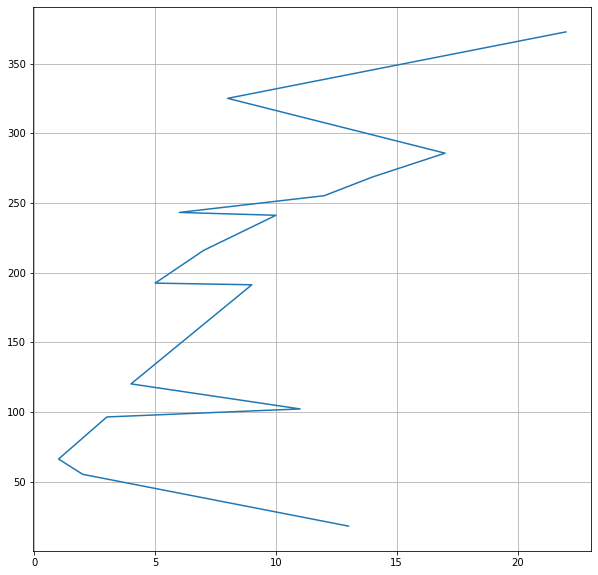

In [69]:

bed_room_group = df.groupby(df.bedroom)
mean_price_by_bedroom = pd.DataFrame(bed_room_group['trieu/m2'].mean()).sort_values('trieu/m2' ,ascending=False)
mean_price_by_bedroom
fig = plt.figure(figsize=(10,10))
plt.plot(mean_price_by_bedroom.index, mean_price_by_bedroom['trieu/m2'])
plt.grid()
plt.show()